# Ein CNN Modell mithilfe von Tensorflow bzw. Keras

von Eric Hirsch und Jonas Morsch 

### Einbinden aller benötigten Bibliotheken 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)
from tensorflow.keras.preprocessing import image_dataset_from_directory

### Die einzelnen Schichten des Modell aufsetzten 

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(scale=1/127.5,offset=-1),
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (150,150,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(3,activation = "softmax")  #Adding the Output Layer
])

In [ ]:
model.summary()

### Erstellen einer eigenen Metrics

In [3]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Das Modell Compilen 

In [4]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])


### Bilder aus einem Verzeichnis Laden 

In [5]:

training_set = image_dataset_from_directory("BIG_Bilder",
                                             shuffle=True,
                                             validation_split=0.2,
                                             subset="training",
                                             batch_size=32,
                                             image_size=(150, 150),
                                             seed=1337,
                                             label_mode = 'categorical')

val_dataset = image_dataset_from_directory("Big_Bilder",
                                                  shuffle=True,
                                                  validation_split=0.2,
                                                  subset='validation',
                                                  batch_size=32,
                                                  image_size=(150, 150),
                                                  seed=1337,
                                                  label_mode = 'categorical')

Found 4830 files belonging to 3 classes.
Using 3864 files for training.
Found 4830 files belonging to 3 classes.
Using 966 files for validation.


### Modell trainieren 

In [6]:
history=model.fit(training_set,epochs=20,validation_data=val_dataset,batch_size=32)

Epoch 1/20
121/121 [==============================] - 26s 203ms/step - loss: 1.0761 - accuracy: 0.4019 - f1_m: 0.0820 - precision_m: 0.2867 - recall_m: 0.0515 - val_loss: 1.0415 - val_accuracy: 0.4327 - val_f1_m: 0.2292 - val_precision_m: 0.5706 - val_recall_m: 0.1465
Epoch 2/20
121/121 [==============================] - 23s 187ms/step - loss: 1.0434 - accuracy: 0.4418 - f1_m: 0.1514 - precision_m: 0.4510 - recall_m: 0.1011 - val_loss: 1.0437 - val_accuracy: 0.4513 - val_f1_m: 0.3595 - val_precision_m: 0.5376 - val_recall_m: 0.2718
Epoch 3/20
121/121 [==============================] - 24s 198ms/step - loss: 0.9558 - accuracy: 0.5321 - f1_m: 0.3734 - precision_m: 0.6309 - recall_m: 0.2808 - val_loss: 0.8968 - val_accuracy: 0.5642 - val_f1_m: 0.4777 - val_precision_m: 0.7512 - val_recall_m: 0.3552
Epoch 4/20
121/121 [==============================] - 32s 261ms/step - loss: 0.7611 - accuracy: 0.6755 - f1_m: 0.6409 - precision_m: 0.7313 - recall_m: 0.5767 - val_loss: 0.6595 - val_accuracy:

### Plotten der Genauigkeit und der Loss Funktion über die Epochen 

dict_keys(['loss', 'accuracy', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_accuracy', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


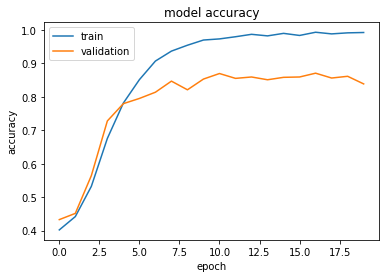

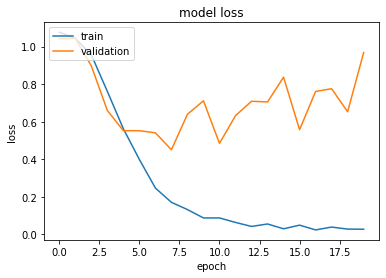

In [9]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Bestimmen einer Klasse mithilfe des trainierten Models 

In [10]:
import cv2
import numpy as np
def load(filename):
   np_image = cv2.imread(filename)
   np_image = cv2.resize(np_image, (150, 150))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load('weiss.JPG')
#0: Dosenoeffner   1:Flaschenoeffner   2:Korkenzieher
model.predict(image)

array([[4.220664e-12, 1.000000e+00, 3.780647e-11]], dtype=float32)